In [1]:
%%HTML
<style>
div.prompt {display:none}
</style>

# Regresión multiple utilizando grandiente descendente de TensorFlow

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import sys

In [3]:
sys.path.append('/home/pedro/git/ElCuadernillo/ElCuadernillo/20160220_TensorFlowRegresionMultiple')

In [4]:
import gradient_descent_tensorflow as gdt

## Input
Generamos la muestra de grado 5

Coeficientes:  [-1.08518112 -4.86650141  3.55909257  4.32554846]


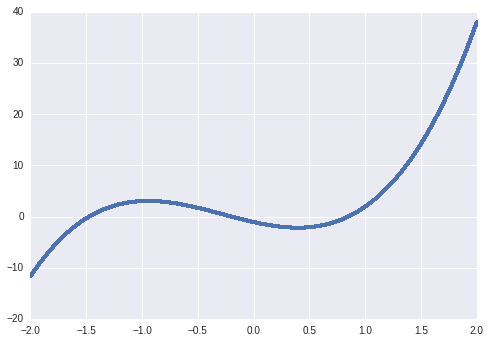

In [13]:
grado=4
tamano=100000
x,y,coeficentes=gdt.generar_muestra(grado,tamano)
print ("Coeficientes: ",coeficentes)
plt.plot(x,y,'.')

## Problema
**Calcular los coeficientes que mejor se ajusten a la muestra sabiendo que es de grado 5**

Generamos la matriz de coeficientes de grado 5

In [14]:
train_x=gdt.generar_matriz_coeficientes(x,grado) # MatrizA
train_y=np.reshape(y,(y.shape[0],-1)) # VectorColumna

### Solucion 1: Por medio *gradient descent*
Se va a calcular minimizando *ecm* por medio de *GradientDescent*

In [15]:
pesos_gd,ecm,t_c_gd=gdt.regression_gradient_descent(train_x,train_y,diff_error_parada=1e-4)

Iteracion 0:
	Pesos: [ 0.07320742  0.1470702   0.19885227  0.47953635]
	ecm: 99.34159851074219
Iteracion 200:
	Pesos: [-0.58024573 -2.21714735  3.32107711  3.37865615]
	ecm: 1.629904866218567
Iteracion 400:
	Pesos: [-0.97155124 -3.62738228  3.50553012  3.88268089]
	ecm: 0.33678770065307617
Iteracion 600:
	Pesos: [-1.05961025 -4.28695822  3.54703903  4.11841726]
	ecm: 0.07267174124717712
Iteracion 800:
	Pesos: [-1.07942677 -4.59544659  3.55638003  4.22867203]
	ecm: 0.015846019610762596
Iteracion 826:
	Pesos: [-1.080441   -4.62094307  3.55685806  4.23778486]
	ecm: 0.013002973981201649
-------------------------------------------------------------------------
Iteracion 826:
	Pesos: [-1.080441   -4.62094307  3.55685806  4.23778486]
	ecm: 0.013002973981201649
-------------------------------------------------------------------------
Tiempo de calculo: 12.130208492279053


Mostramos la curva de error por iteracion

### Solución 2: Por medio *stochastic gradient descent*
Mucho mas rápido para grandes volumenes de datos

In [27]:
pesos_sgd,ecm,t_c_sgd=gdt.regression_stochastic_gradient_descent(train_x,train_y,1000,diff_error_parada=1e-4)

Iteracion 200:
	Pesos: [-0.58090049 -2.20817447  3.32025838  3.38156724]
	ecm: 1.6440212726593018
Iteracion 400:
	Pesos: [-0.98682964 -3.62498927  3.51430655  3.87524843]
	ecm: 0.33942845463752747
-------------------------------------------------------------------------
Iteracion 553:
	Pesos: [-1.05111432 -4.1734333   3.54234004  4.07348108]
	ecm: 0.10962517559528351
-------------------------------------------------------------------------
Tiempo de calculo: 0.5247683525085449


## Resultados:

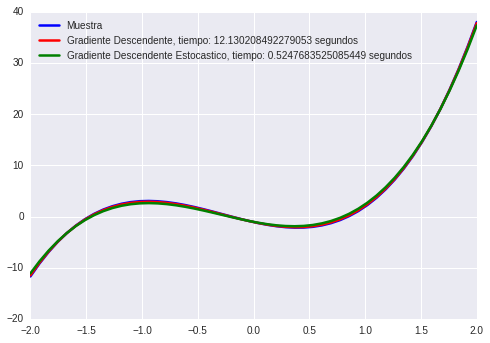

In [29]:
plt=gdt.grafica_resultados(coeficentes,pesos_gd,pesos_sgd,t_c_gd,t_c_sgd)
plt.show()